In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras 
import xgboost 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
students = pd.read_csv('StudentsPerformance.csv')

students.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
s = students.dtypes == 'object'
object_cols = list(s[s].index)

In [23]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_students = pd.DataFrame(encoder.fit_transform(students[object_cols]))

index_students = students.drop(object_cols, axis=1)

new_students = pd.concat([index_students, encoded_students], axis=1)

new_students.columns = new_students.columns.astype(str)

new_students





,math score,reading score,writing score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,72,72,74,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,90,88,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,90,95,93,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47,57,44,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,76,78,75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,62,55,55,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,59,71,65,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,68,78,77,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
scaler = StandardScaler(with_mean=True)

scaled_students = pd.DataFrame(scaler.fit_transform(new_students))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.390024,0.193999,0.391492,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.595830,-0.403473,-0.534179,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748
1,0.192076,1.427476,1.313269,0.964625,-0.964625,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,-0.741881,0.741881,1.339140,-1.339140
2,1.577711,1.770109,1.642475,0.964625,-0.964625,-0.312562,2.064742,-0.684419,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,-0.741881,0.741881,-0.746748,0.746748
3,-1.259543,-0.833899,-1.583744,-1.036672,1.036672,3.199368,-0.484322,-0.684419,-0.595830,-0.403473,1.872032,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,1.347925,-1.347925,-0.746748,0.746748
4,0.653954,0.605158,0.457333,-1.036672,1.036672,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,-0.741881,0.741881,-0.746748,0.746748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,0.964625,-0.964625,-0.312562,-0.484322,-0.684419,-0.595830,2.478479,-0.534179,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,-0.741881,0.741881,1.339140,-1.339140
996,-0.269803,-0.970952,-0.859491,-1.036672,1.036672,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,2.025350,-0.250398,-0.540361,-0.466933,1.347925,-1.347925,-0.746748,0.746748
997,-0.467751,0.125472,-0.201079,0.964625,-0.964625,-0.312562,-0.484322,1.461094,-0.595830,-0.403473,-0.534179,-0.365769,2.025350,-0.250398,-0.540361,-0.466933,1.347925,-1.347925,1.339140,-1.339140
998,0.126093,0.605158,0.589015,0.964625,-0.964625,-0.312562,-0.484322,-0.684419,1.678331,-0.403473,-0.534179,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,-0.741881,0.741881,1.339140,-1.339140


In [40]:

y = scaled_students.iloc[:,0]

X = scaled_students.iloc[:,1:]



In [41]:
from sklearn.model_selection import train_test_split # to create training and validation sets
from sklearn.metrics import mean_absolute_error # to find The mae
trainX, valX, trainy, valy = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0, shuffle=True)

In [44]:
from tensorflow.keras import layers
import tensorflow as tf

In [47]:
input_shape = [X.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1),
    ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss='mse', 
              metrics=['mae'])
earlystopping = keras.callbacks.EarlyStopping(min_delta=0.001, patience=30, restore_best_weights=True)

Epoch 1/500


2025-08-02 17:12:24.053541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - loss: 2.4185 - mae: 1.2622 - val_loss: 0.5244 - val_mae: 0.5671
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.5029 - mae: 0.9571 - val_loss: 0.3529 - val_mae: 0.4605
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.3685 - mae: 0.9075 - val_loss: 0.3190 - val_mae: 0.4438
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.3626 - mae: 0.9239 - val_loss: 0.2623 - val_mae: 0.3990
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1942 - mae: 0.8611 - val_loss: 0.2611 - val_mae: 0.4014
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0635 - mae: 0.7984 - val_loss: 0.2988 - val_mae: 0.4264
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9627 - mae: 0.7646 - val_loss: 0.2737 - val_mae: 0.4086
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9228 - mae: 0.7673 - val_loss: 0.2655 - val_mae: 0.4021
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9074 - mae: 0.7586 - va

<Axes: >

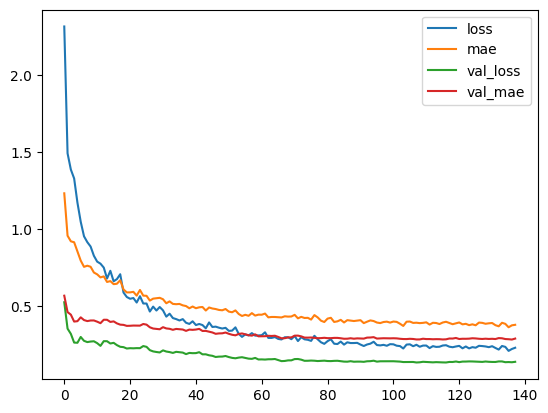

In [48]:
plotting = model.fit(trainX,trainy, validation_data=(valX,valy), batch_size=256, epochs=500, callbacks=earlystopping)

plot_the_learning = pd.DataFrame(plotting.history) 
plot_the_learning.plot() # plotting the soutionv

In [49]:
pred = model.predict(valX)

mean_absolute_error(pred, valy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


0.28266246449833604